# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
import json
import scipy.stats as st

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#import API keys
from api_keys import weather_api_key

# Importing random library for randomizing longitudes
import random

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding latitude, longitude and cities
latitude_longitude = []
cities = []

# Create a set of random latitude and longitude combinations
Latitude = np.random.uniform (low=-90.000, high=90.000, size=2000)
Longitude = np.random.uniform (low=-180.000, high=180.000, size=2000)
latitude_longitude = zip(Latitude, Longitude)

# Identify nearest city for each latitude and longitude combinations
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
len(cities)

787

In [3]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = "25bc90a1196e6f153eece0bc0b0fc9eb"
appid = weather_api_key
settings = {"units": "imperial", "appid": weather_api_key}
url = f"{url}appid={weather_api_key}&units={units}"

In [4]:
url

'http://api.openweathermap.org/data/2.5/weather?appid=4b828953e9434fbeea43e9df3038d8af&units=imperial'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | khonuu
City not found...
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | pochutla
Processing Record 12 of Set 1 | phalaborwa
Processing Record 13 of Set 1 | kondagaon
Processing Record 14 of Set 1 | buqayq
City not found...
Processing Record 15 of Set 1 | batemans bay
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | debre tabor
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | samusu
City not found...
Processing Record 38 of Set 4 | harrison
Processing Record 39 of Set 4 | flin flon
Processing Record 40 of Set 4 | veshenskaya
Processing Record 41 of Set 4 | illoqqortoormiut
City not found...
Processing Record 42 of Set 4 | barawe
City not found...
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | halalo
City not found...
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | rovaniemi
Processing Record 47 of Set 4 | palafrugell
Processing Record 48 of Set 4 | porto novo
Processing Record 49 of Set 4 | clyde river
Processing Record 0 of Set 5 | qaqortoq
Processing Record 1 of Set 5 | highland
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | allende
Processing Record 4 of Set 5 | anandpur sahib
Processing Record 5 of Set 5 | kaifeng
Processing Record 6 of Set 5 | yuzhno-yeniseyskiy
City not found...
Processing Record 7 of Set 5 | asyut
Processing Record 8 of Set 5

Processing Record 31 of Set 8 | san policarpo
Processing Record 32 of Set 8 | gamba
Processing Record 33 of Set 8 | sao filipe
Processing Record 34 of Set 8 | derzhavinsk
Processing Record 35 of Set 8 | grand junction
Processing Record 36 of Set 8 | amderma
City not found...
Processing Record 37 of Set 8 | sirur
Processing Record 38 of Set 8 | pitiquito
Processing Record 39 of Set 8 | wamba
Processing Record 40 of Set 8 | bandarbeyla
Processing Record 41 of Set 8 | yazykovo
Processing Record 42 of Set 8 | longyearbyen
Processing Record 43 of Set 8 | cheyenne
Processing Record 44 of Set 8 | pendleton
Processing Record 45 of Set 8 | tecoanapa
Processing Record 46 of Set 8 | berlevag
Processing Record 47 of Set 8 | jiuquan
Processing Record 48 of Set 8 | kruisfontein
Processing Record 49 of Set 8 | manicore
Processing Record 0 of Set 9 | chern
Processing Record 1 of Set 9 | grand forks
Processing Record 2 of Set 9 | mapiri
Processing Record 3 of Set 9 | loikaw
Processing Record 4 of Set 9

Processing Record 23 of Set 12 | landeck
Processing Record 24 of Set 12 | tiznit
Processing Record 25 of Set 12 | kouango
Processing Record 26 of Set 12 | volodarskiy
Processing Record 27 of Set 12 | garissa
Processing Record 28 of Set 12 | krasnoselkup
Processing Record 29 of Set 12 | karema
Processing Record 30 of Set 12 | lenki
City not found...
Processing Record 31 of Set 12 | mackay
Processing Record 32 of Set 12 | chuy
Processing Record 33 of Set 12 | vilyuysk
Processing Record 34 of Set 12 | roma
Processing Record 35 of Set 12 | poletayevo
Processing Record 36 of Set 12 | ostra
Processing Record 37 of Set 12 | siemiatycze
Processing Record 38 of Set 12 | puerto del rosario
Processing Record 39 of Set 12 | san andres
Processing Record 40 of Set 12 | diffa
Processing Record 41 of Set 12 | aswan
Processing Record 42 of Set 12 | mahibadhoo
Processing Record 43 of Set 12 | oktyabrskoye
Processing Record 44 of Set 12 | high level
Processing Record 45 of Set 12 | sosva
Processing Recor

Processing Record 13 of Set 16 | mucurapo
Processing Record 14 of Set 16 | dothan
Processing Record 15 of Set 16 | rio grande
Processing Record 16 of Set 16 | asfi
Processing Record 17 of Set 16 | klyuchi
Processing Record 18 of Set 16 | beihai
Processing Record 19 of Set 16 | santiago del estero
Processing Record 20 of Set 16 | talavera
Processing Record 21 of Set 16 | kaplice
Processing Record 22 of Set 16 | lucapa
Processing Record 23 of Set 16 | cairns
Processing Record 24 of Set 16 | marienburg
Processing Record 25 of Set 16 | angra
City not found...
Processing Record 26 of Set 16 | elmhurst
Processing Record 27 of Set 16 | kulhudhuffushi
Processing Record 28 of Set 16 | ciudad bolivar
Processing Record 29 of Set 16 | santiago
Processing Record 30 of Set 16 | karcag
Processing Record 31 of Set 16 | makakilo city
Processing Record 32 of Set 16 | cap malheureux
Processing Record 33 of Set 16 | henties bay
Processing Record 34 of Set 16 | auriflama
Processing Record 35 of Set 16 | te

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)


# Display the DataFrame
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-9.40,70,40,6.91,US,1616211738
1,east london,-33.0153,27.9116,70.92,89,94,5.59,ZA,1616211739
2,dunedin,-45.8742,170.5036,64.99,58,39,5.01,NZ,1616211740
3,sitka,57.0531,-135.3300,32.00,74,75,4.61,US,1616211740
4,port alfred,-33.5906,26.8910,69.69,93,95,14.12,ZA,1616211741
...,...,...,...,...,...,...,...,...,...
719,cap malheureux,-19.9842,57.6142,78.01,84,10,5.01,MU,1616212269
720,henties bay,-22.1160,14.2845,61.00,92,21,3.00,NA,1616212269
721,auriflama,-20.6856,-50.5547,71.44,77,80,6.69,BR,1616212270
722,tessalit,20.1986,1.0114,62.58,12,0,2.06,ML,1616212271


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
city_data_pd.describe()


NameError: name 'city_data_pd' is not defined

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
print ("Not city data has more than 100% humidity")


Not city data has more than 100% humidity


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

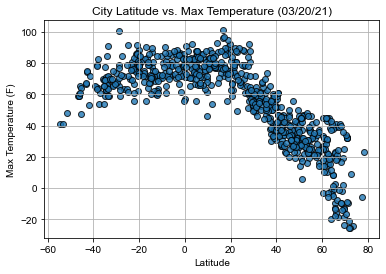

In [11]:
# Build scatter plot for latitude vs temperature
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("images\Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

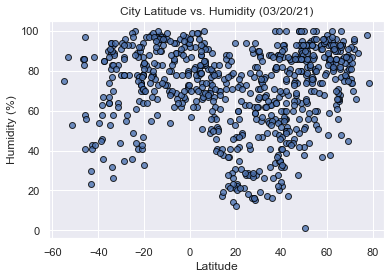

In [12]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("images\Latitude vs Humidity (%).png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

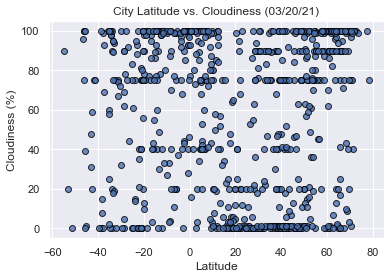

In [13]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("images\Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

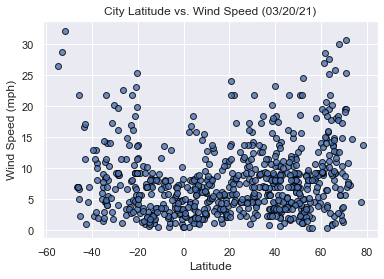

In [14]:
# Build the scatter plots for each city types
plt.scatter(city_data_pd["Lat"], 
            city_data_pd["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("images\Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

## Linear Regression

In [15]:
#define scatter chart formatting
def scatter_chart(x_values,y_values,x_axis_label,y_axis_label,title,regress):
#     pd.to_numeric(x_values)
#     pd.to_numeric(y_values)
    x_values.astype("float32")
    y_values.astype("float32")

    plt.scatter(x_values,y_values)
    if regress==True:
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        r_sq="r-sq="+str(round(rvalue,2))
        plt.plot(x_values,regress_values,"r-")
        print ("The r-value is: " + r_sq)
        # Indicate annotation position on chart
        x_location=round(np.percentile(x_values,30),0)
        y_location=round(np.percentile(regress_values,30),0)
        
        plt.annotate(line_eq,(x_location,y_location),fontsize=15,color="red")
        plt.annotate(r_sq,(x_location,y_location-10),fontsize=15,color="red")
        #plt.annotate(line_eq,(290,30),fontsize=15,color="red")
        #plt.annotate(r_sq,(280,30),fontsize=15,color="red")
        
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.title(title)
    #saving plots to the Images folder
    plt.savefig(f"images/{title}.png")
    plt.show()

The r-value is: r-sq=-0.88


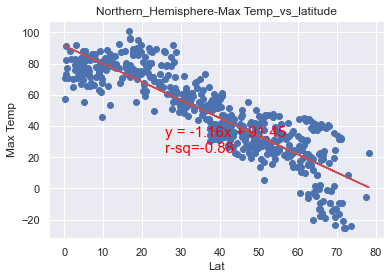

The r-value is: r-sq=0.25


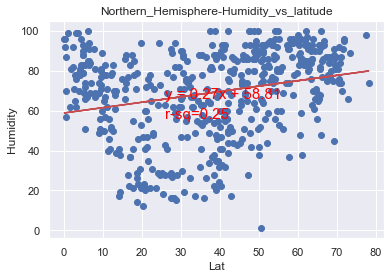

The r-value is: r-sq=0.14


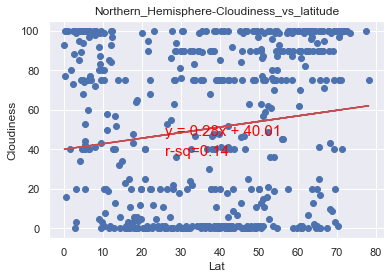

The r-value is: r-sq=0.28


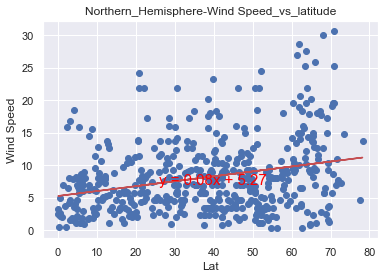

The r-value is: r-sq=0.47


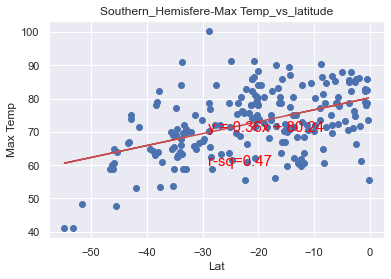

The r-value is: r-sq=0.3


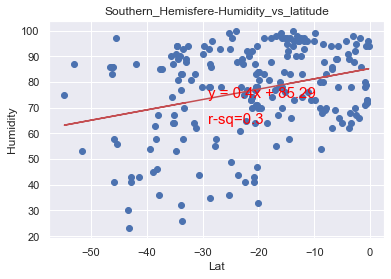

The r-value is: r-sq=0.17


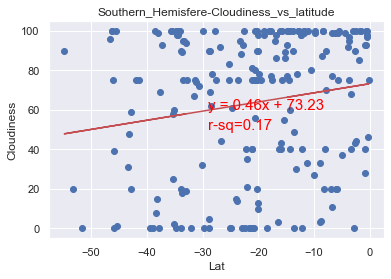

The r-value is: r-sq=-0.39


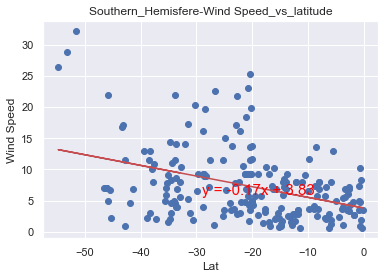

In [16]:
# Divide into northern and southern hemisfere and print with regression
# city_data_pd
northern_hemisphere_pd=city_data_pd[city_data_pd["Lat"]>=0]
southern_hemisphere_pd=city_data_pd[city_data_pd["Lat"]<0]
parameter_vs_latitude=["Max Temp","Humidity","Cloudiness","Wind Speed"]

regions=["Northern_Hemisphere","Southern_Hemisfere"]
regress=True
for region in regions:
    for y_parameter in parameter_vs_latitude:
        if region=="Northern_Hemisphere":
            data_used_pd=northern_hemisphere_pd
        elif region=="Southern_Hemisfere":
            data_used_pd=southern_hemisphere_pd
        x_values=data_used_pd["Lat"].astype("float32")
        y_values=data_used_pd[y_parameter].astype("float32")
        x_axis_label="Lat"
        y_axis_label=y_parameter
        title=f"{region}-{y_parameter}_vs_latitude"
        scatter_chart(x_values,y_values,x_axis_label,y_axis_label,title,regress)

In [17]:
# Observation
# 1) As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
# 2) It seems that there is no correlation between humidity and latitude
# 3)Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic
